# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics as metrics
from sklearn.metrics import mean_squared_error


%matplotlib inline

# 2. Import dataset

In [2]:
df = pd.read_csv(r'C:\Users\Mario Fionda\Documents\Python\house-prices-advanced-regression-techniques\train.csv')
df_test = pd.read_csv(r'C:\Users\Mario Fionda\Documents\Python\house-prices-advanced-regression-techniques\test.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df = df.drop(columns = ['Id'])

In [5]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 3. Dealing with null values

In [6]:
pd.options.display.max_rows = 4000
df.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [7]:
import missingno as msno

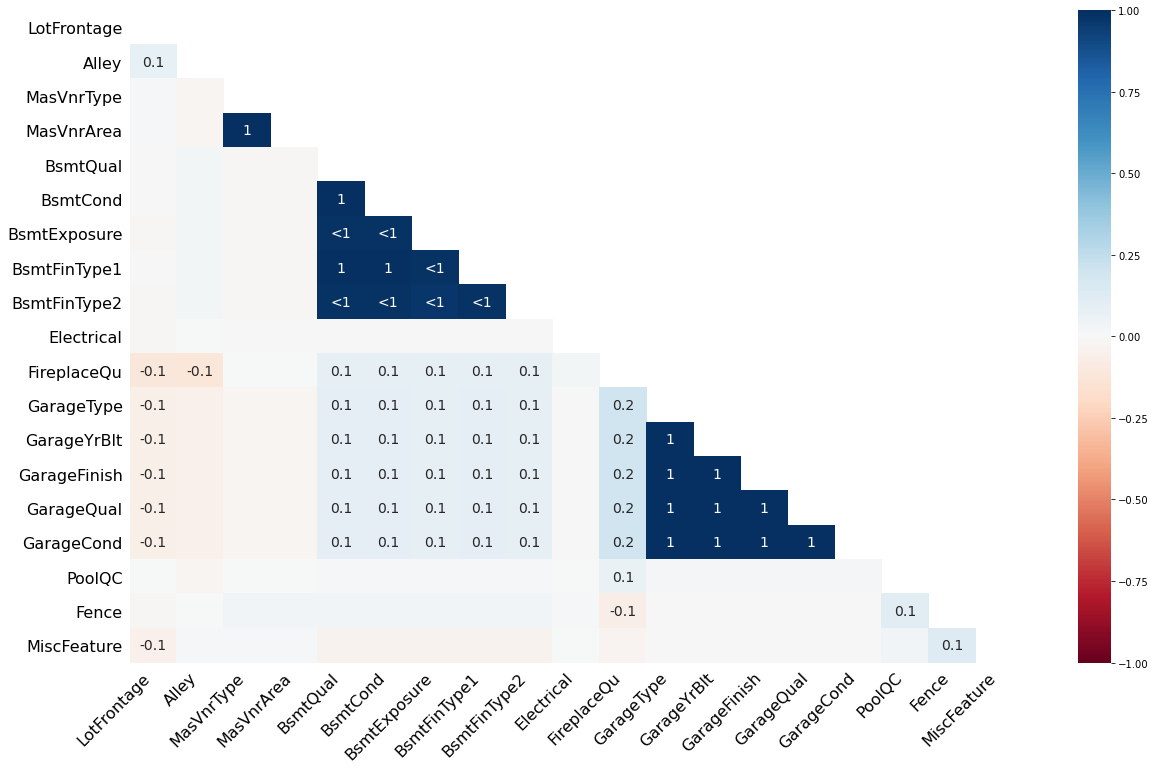

In [8]:
msno.heatmap(df, labels = list(df.columns))

In [9]:
df1 = df.fillna(value = 'None')

# 3.1 Managing Exceptions

In [10]:
for i in range(len(df1['MSSubClass'])):                              
    if (df1['MasVnrType'].values[i]=='None'):
        df1['MasVnrArea'].values[i]=0
    if (df1['LotFrontage'].values[i]=='None'):
        df1['LotFrontage'].values[i]=0
 

In [11]:
df1 = df1.drop(columns = ['GarageYrBlt'])

In [12]:
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


# 4. Dealing with categorical variables

In [13]:
df2 = df1.copy()

In [14]:
df2['MasVnrArea'] = df1['MasVnrArea'].astype('int64')
df2['LotFrontage'] = df1['LotFrontage'].astype('int64')
df2['SalePrice'] = df1['SalePrice'].astype('int64') ###

In [15]:
df3 = pd.get_dummies(df2)

In [16]:
df3.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65,8450,7,5,2003,2003,196,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80,9600,6,8,1976,1976,0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68,11250,7,5,2001,2002,162,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60,9550,7,5,1915,1970,0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84,14260,8,5,2000,2000,350,655,0,...,0,0,0,1,0,0,0,0,1,0


In [17]:
df3.insert(0, 'SalePrice', df3.pop('SalePrice'))

In [18]:
df3.head()

,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,60,65,8450,7,5,2003,2003,196,706,...,0,0,0,1,0,0,0,0,1,0
1,181500,20,80,9600,6,8,1976,1976,0,978,...,0,0,0,1,0,0,0,0,1,0
2,223500,60,68,11250,7,5,2001,2002,162,486,...,0,0,0,1,0,0,0,0,1,0
3,140000,70,60,9550,7,5,1915,1970,0,216,...,0,0,0,1,1,0,0,0,0,0
4,250000,60,84,14260,8,5,2000,2000,350,655,...,0,0,0,1,0,0,0,0,1,0


# 5. Features selection using Random Forest

In [19]:
clf = ExtraTreesClassifier(n_estimators=1000)

In [20]:
clf = clf.fit(df3.iloc[:,1:], df3['SalePrice'])

In [21]:
clf.feature_importances_ 

array([1.06625840e-02, 1.94012920e-02, 2.05341712e-02, 1.49639379e-02,
       1.08755616e-02, 1.88317179e-02, 1.91315728e-02, 1.31610076e-02,
       1.80247938e-02, 4.57653878e-03, 2.06779789e-02, 1.99746168e-02,
       2.03964020e-02, 1.28279506e-02, 8.53053603e-04, 2.09266269e-02,
       1.08503874e-02, 3.01298696e-03, 7.28693422e-03, 8.61582314e-03,
       1.22588508e-02, 1.39874268e-03, 1.69893633e-02, 8.64603539e-03,
       9.45396455e-03, 1.96847717e-02, 1.58770809e-02, 1.67171299e-02,
       5.60963876e-03, 1.23925940e-03, 4.31445715e-03, 1.68777697e-04,
       1.68421755e-03, 2.06809393e-02, 1.91349077e-02, 3.04198657e-04,
       1.60145362e-03, 6.07404901e-04, 5.02297919e-03, 3.76301965e-03,
       1.71564590e-04, 1.71542490e-04, 1.38025451e-03, 2.35538177e-03,
       1.27632425e-03, 8.86164344e-03, 1.84494746e-03, 4.13185177e-04,
       8.98665355e-03, 1.88626717e-03, 1.74595802e-03, 1.19467705e-03,
       4.05985268e-03, 2.70471214e-05, 2.58022237e-05, 7.86983601e-03,
      

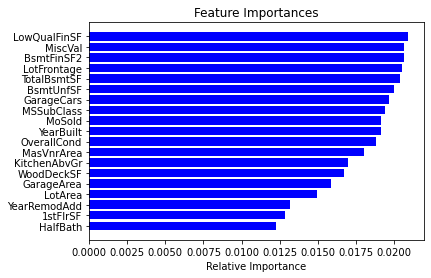

In [22]:
features = df3.columns
importances = clf.feature_importances_
indices = np.argsort(importances)[-19:]  # top 20 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [23]:
model = SelectFromModel(clf, prefit=True)

In [24]:
x = model.transform(df3.iloc[:,1:])

In [25]:
x.shape

(1460, 95)

In [26]:
cols = list(df3.columns[1:])
getsup = model.get_support()
newcols = []

In [27]:
for i in range(len(getsup)):
    if getsup[i] == True:
        newcols.append(cols[i])

In [28]:
saleprice = df3.iloc[:,0]

In [29]:
dfsp = pd.DataFrame (data = saleprice)

In [30]:
df4 = pd.DataFrame(data = x, columns = newcols)

In [31]:
df4.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_Attchd,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Fence_MnPrv,Fence_None,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal
0,60,65,8450,7,5,2003,2003,196,706,0,...,1,0,0,1,0,0,1,1,0,1
1,20,80,9600,6,8,1976,1976,0,978,0,...,1,0,0,1,0,0,1,1,0,1
2,60,68,11250,7,5,2001,2002,162,486,0,...,1,0,0,1,0,0,1,1,0,1
3,70,60,9550,7,5,1915,1970,0,216,0,...,0,1,0,0,1,0,1,1,1,0
4,60,84,14260,8,5,2000,2000,350,655,0,...,1,0,0,1,0,0,1,1,0,1


In [32]:
data = dfsp.join(df4)

In [33]:
data.head()

,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType_Attchd,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Fence_MnPrv,Fence_None,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal
0,208500,60,65,8450,7,5,2003,2003,196,706,...,1,0,0,1,0,0,1,1,0,1
1,181500,20,80,9600,6,8,1976,1976,0,978,...,1,0,0,1,0,0,1,1,0,1
2,223500,60,68,11250,7,5,2001,2002,162,486,...,1,0,0,1,0,0,1,1,0,1
3,140000,70,60,9550,7,5,1915,1970,0,216,...,0,1,0,0,1,0,1,1,1,0
4,250000,60,84,14260,8,5,2000,2000,350,655,...,1,0,0,1,0,0,1,1,0,1


# 6. Regression model using Gradient Boosting

In [34]:
regressor = GradientBoostingRegressor(max_depth = 2, n_estimators = 100, learning_rate = 0.1)
regressor.fit(data.iloc[:,1:],data['SalePrice'])

GradientBoostingRegressor(max_depth=2)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,1:],data['SalePrice'], test_size = 0.3)

In [36]:
errors = [mean_squared_error(y_test, y_pred)
          for y_pred in regressor.staged_predict(x_test)]
print(errors)

[4892535327.854926, 4350918711.237696, 3872011640.891429, 3479317673.361004, 3154226581.416374, 2882417538.8786364, 2603690051.6663346, 2383040228.0008564, 2200372579.241654, 2049560590.6593196, 1898344060.2953029, 1765465049.4800084, 1641317619.2338037, 1536698583.0197754, 1448673850.35347, 1363336442.4775739, 1297317481.0154104, 1236016650.3944774, 1193468755.1408596, 1132118572.4896638, 1087935369.391997, 1050294394.9247913, 1017871592.6982043, 974263035.1518378, 939019965.2893441, 919048388.3002127, 887195248.6012021, 864727980.0704335, 840058329.2560394, 821906170.7755544, 804554598.9379085, 789420492.9104719, 773589624.1274925, 754461301.2792252, 738921864.0363672, 724838151.2304282, 715836627.5724235, 703264661.2636497, 688567911.6687807, 675196265.8518229, 665856262.0310819, 655635494.2576033, 642927557.9157027, 633080075.3365744, 623146384.060346, 617886113.1793896, 614056823.1404442, 603022375.8410704, 597851029.8518119, 588410454.8789779, 586868064.6122073, 582222608.5666363

In [37]:
best_n_estimators = np.argmin(errors)
print(best_n_estimators)

99


In [38]:
y_pred = regressor.predict(x_test)

# 7. Model Valuation Report: R2, MAE, MSE, RMSE

In [39]:
explained_variance=metrics.explained_variance_score(y_test, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
mse=metrics.mean_squared_error(y_test, y_pred) 
mean_squared_log_error=metrics.mean_squared_log_error(y_test, y_pred)
median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
r2=metrics.r2_score(y_test, y_pred)

print('explained_variance: ', round(explained_variance,4))    
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))
    

explained_variance:  0.9276
mean_squared_log_error:  0.0135
r2:  0.9275
MAE:  14291.1737
MSE:  401947644.6599
RMSE:  20048.632


# 8. Predictions 

In [40]:
df_test = df_test.drop(columns = ['GarageYrBlt'])

In [41]:
df_test = df_test.fillna(value = 'None')

In [42]:
for i in range(len(df_test['MSSubClass'])):                              
    if (df_test['MasVnrType'].values[i]=='None'):
        df_test['MasVnrArea'].values[i]=0
    if (df_test['LotFrontage'].values[i]=='None'):
        df_test['LotFrontage'].values[i]=0
    if (df_test['BsmtFinSF1'].values[i]=='None'):
        df_test['BsmtFinSF1'].values[i]=0
    if (df_test['BsmtFinSF2'].values[i]=='None'):
        df_test['BsmtFinSF2'].values[i]=0
    if (df_test['BsmtUnfSF'].values[i]=='None'):
        df_test['BsmtUnfSF'].values[i]=0
    if (df_test['TotalBsmtSF'].values[i]=='None'):
        df_test['TotalBsmtSF'].values[i]=0
    if (df_test['GarageArea'].values[i]=='None'):
        df_test['GarageArea'].values[i]=0
    if (df_test['BsmtFullBath'].values[i]=='None'):
        df_test['BsmtFullBath'].values[i]=0
    if (df_test['GarageCars'].values[i]=='None'):
        df_test['GarageCars'].values[i]=0

In [43]:
df_pred = df_test.copy()

In [44]:
list(df_pred.select_dtypes(include = ['object']))

['MSZoning',
 'LotFrontage',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [45]:
df_pred['MasVnrArea'] = df_pred['MasVnrArea'].astype('int64')
df_pred['LotFrontage'] = df_pred['LotFrontage'].astype('int64')
df_pred['BsmtFinSF1'] = df_pred['BsmtFinSF1'].astype('int64')
df_pred['BsmtFinSF2'] = df_pred['BsmtFinSF2'].astype('int64')
df_pred['BsmtUnfSF'] = df_pred['BsmtUnfSF'].astype('int64')
df_pred['TotalBsmtSF'] = df_pred['TotalBsmtSF'].astype('int64')
df_pred['GarageArea'] = df_pred['GarageArea'].astype('int64')
df_pred['BsmtFullBath'] = df_pred['BsmtFullBath'].astype('int64')
df_pred['GarageCars'] = df_pred['GarageCars'].astype('int64')

In [46]:
df_pred = pd.get_dummies(df_pred)

In [47]:
df_pred = df_pred.drop(columns = ['SaleType_None'])

In [48]:
id_col = df_pred.iloc[:,0]
df_pred = df_pred.drop(['Id'], axis = 1)

In [49]:
colon_data = list(data.columns[1:])
colon_test = list(df_pred[:])

In [50]:
len(colon_test)

292

In [51]:
for i in range(len(colon_test)):
    if colon_test[i] not in colon_data:
        df_pred = df_pred.drop(labels = colon_test[i], axis = 1)
        

In [52]:
predictions = regressor.predict(df_pred)

In [53]:
predictions.reshape(1459,1)

array([[121739.45833576],
       [163070.16005805],
       [174234.30849799],
       ...,
       [170528.5960647 ],
       [120631.25817911],
       [238431.68395367]])

In [54]:
data_predictions = pd.DataFrame()
data_predictions['Id'] = id_col
data_predictions['SalePrice'] = predictions

In [55]:
data_predictions.to_csv(r'C:\Users\Mario Fionda\Documents\Python\house-prices-advanced-regression-techniques\predictions.csv', index = False)